# Выпускная квалификационная работа - 2 Разведочный анализ данных

проведение оценки распределения данных


In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

In [2]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [3]:
from scipy import stats
from scipy.stats import shapiro, kstest, boxcox
import statsmodels.api as sm

## Загрузка данных

In [4]:
df = pd.read_excel('data/data_outliers_cleaned.xlsx', index_col=0)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [5]:
df.shape

(936, 13)

In [6]:
cols_numerical = df.loc[:, df.columns != 'Угол нашивки, град']
column_categorical = df.loc[:, df.columns == 'Угол нашивки, град']
cols_numerical.shape

(936, 12)

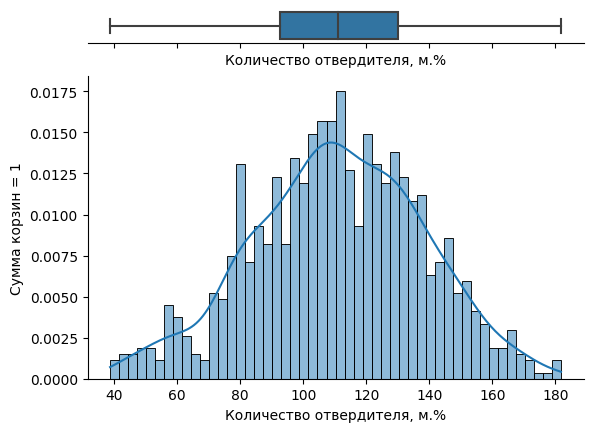

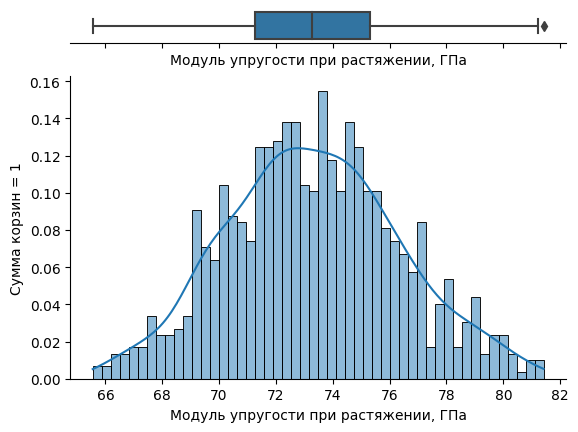

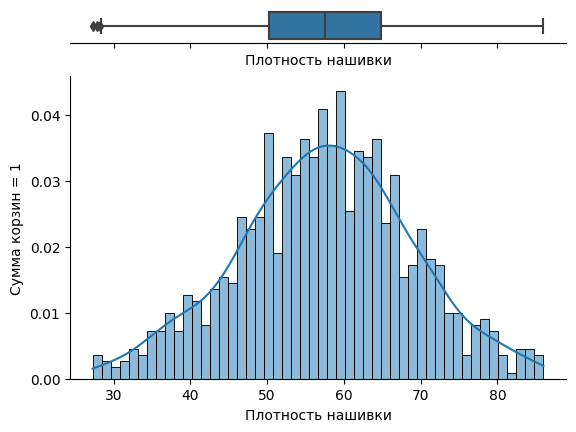

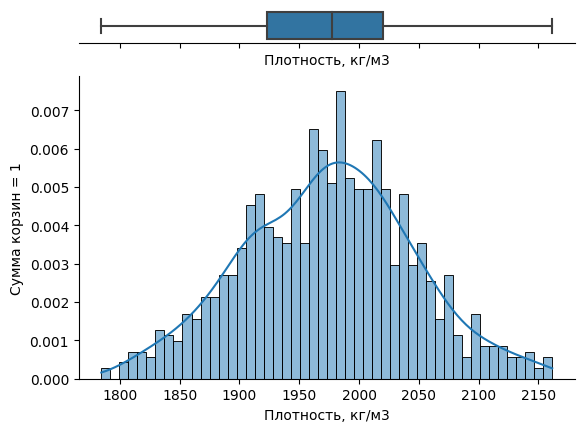

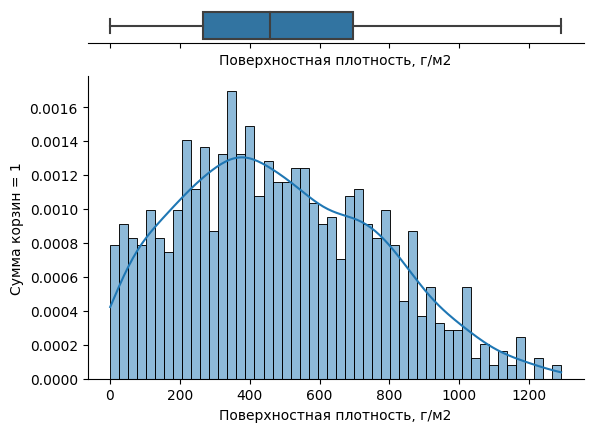

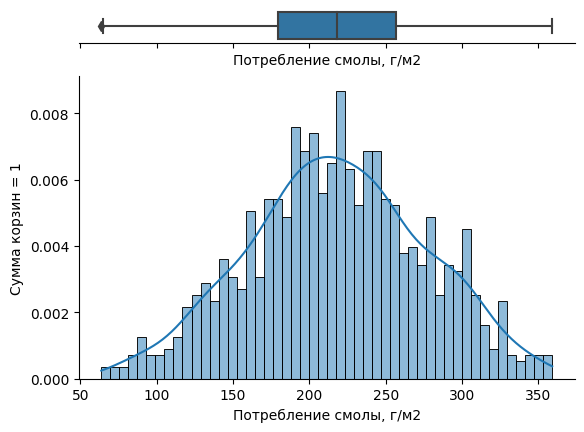

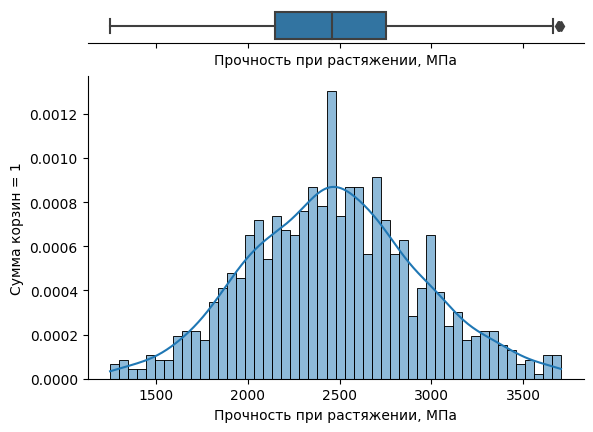

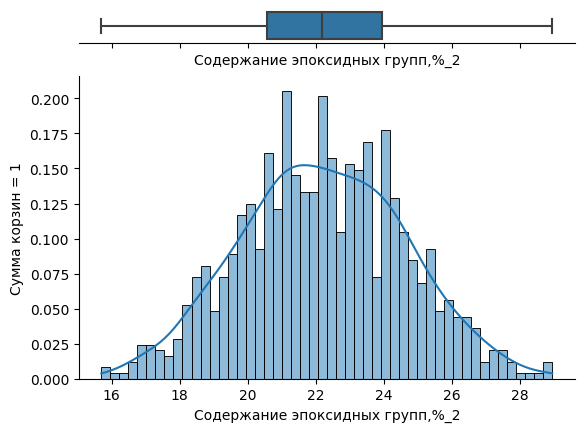

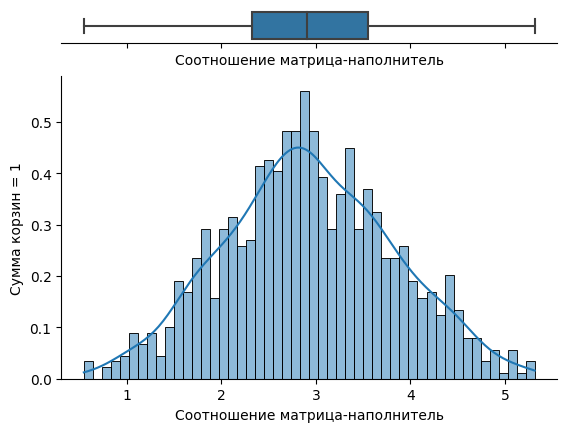

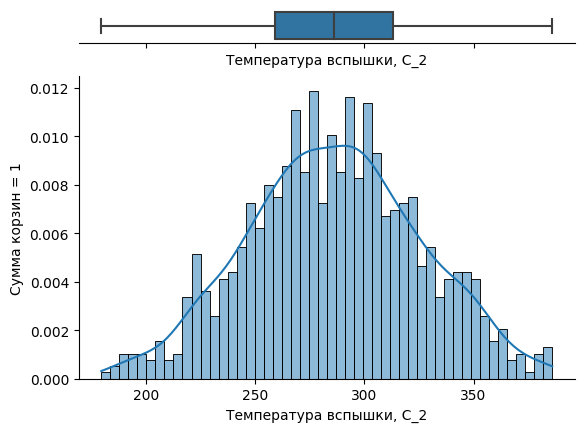

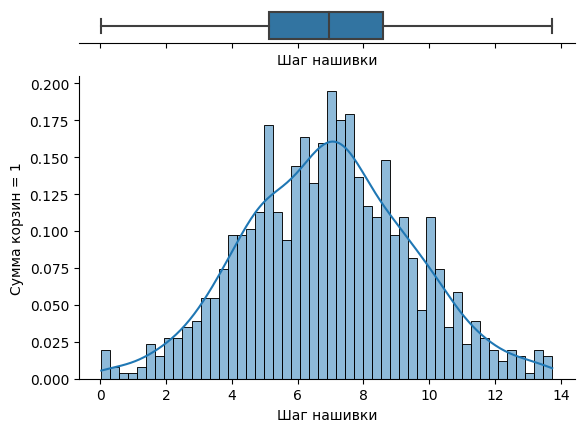

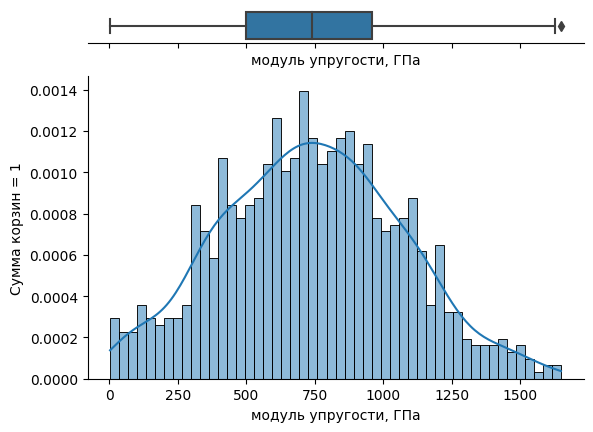

In [7]:
for col in df[df.columns.difference(['Угол нашивки, град'])].columns:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})

    ax_hist.set(ylabel='Сумма корзин = 1')
    sns.boxplot(x=df[col], ax=ax_box)
    sns.histplot(x=df[col], bins=50, kde=True, stat='density', ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [8]:
cols_numerical.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374,6.915585,57.451895
std,0.893712,70.808120,328.708665,27.037891,2.394871,39.400677,280.190377,3.037381,463.838911,57.827255,2.509672,11.239331
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698,0.037639,27.272928
25%,2.321931,1923.443748,498.577158,92.523816,20.571516,259.184486,266.004099,71.248823,2146.936034,179.489091,5.134988,50.209656
50%,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715,6.943337,57.584225
75%,3.546650,2020.158764,958.418993,130.001450,23.961818,312.991425,695.900862,75.310788,2755.169485,256.396777,8.591450,64.798211
max,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220,13.732404,86.012427


In [9]:
cols_numerical.shape

(936, 12)

In [10]:
# Проверка на нормальность распределения модифицированный Критерий Шапиро-Уилка (n до 2000)
# при уровень значимости p < 0.05 распределение не является нормальным

for col in cols_numerical.columns:
    print(f'p = {shapiro(cols_numerical[col].values)[1]:.3f}, {col}')
 

p = 0.087, Соотношение матрица-наполнитель
p = 0.095, Плотность, кг/м3
p = 0.006, модуль упругости, ГПа
p = 0.025, Количество отвердителя, м.%
p = 0.237, Содержание эпоксидных групп,%_2
p = 0.085, Температура вспышки, С_2
p = 0.000, Поверхностная плотность, г/м2
p = 0.023, Модуль упругости при растяжении, ГПа
p = 0.078, Прочность при растяжении, МПа
p = 0.016, Потребление смолы, г/м2
p = 0.349, Шаг нашивки
p = 0.052, Плотность нашивки


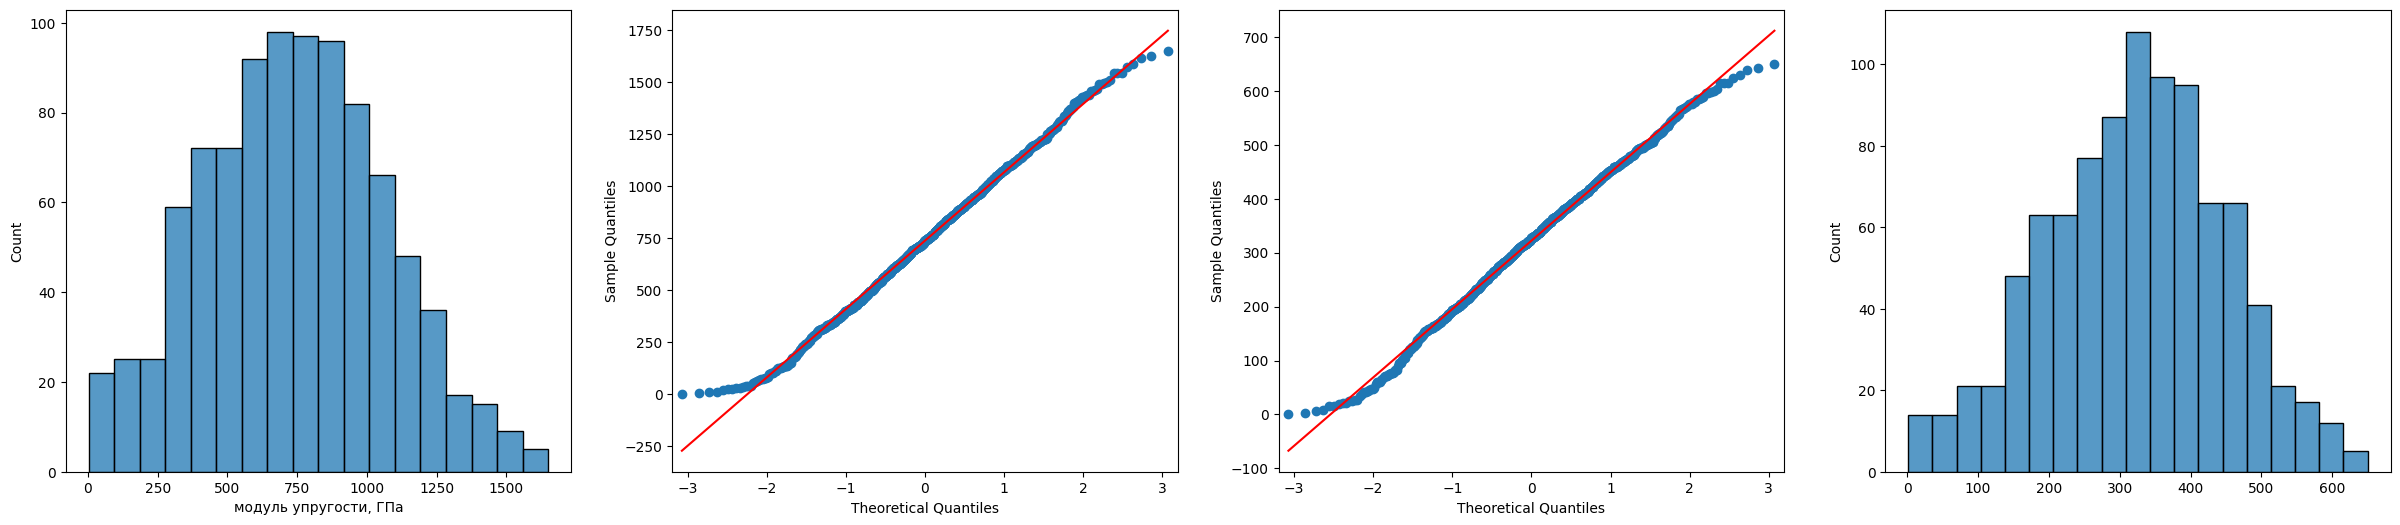

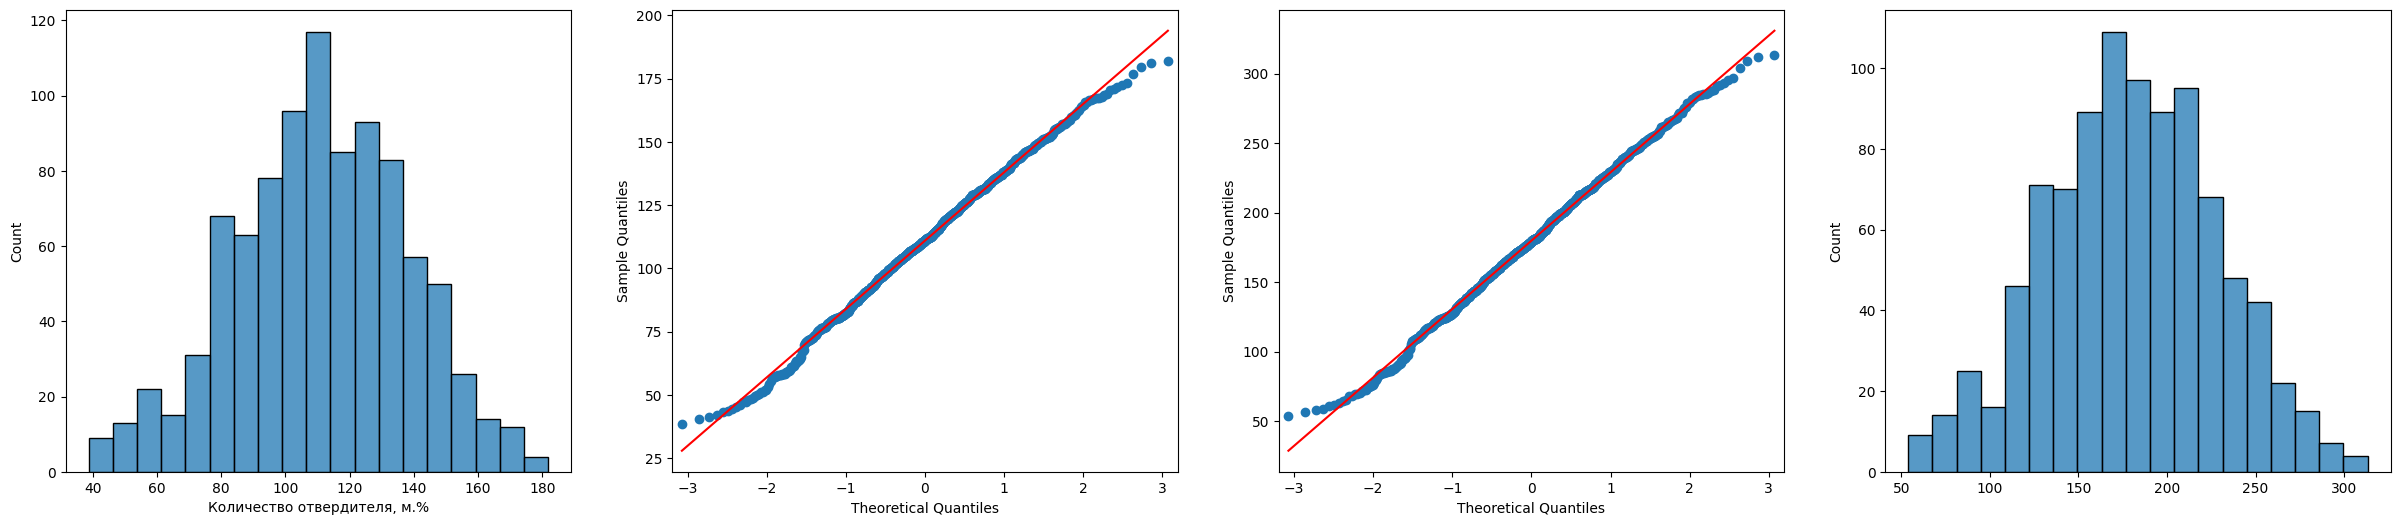

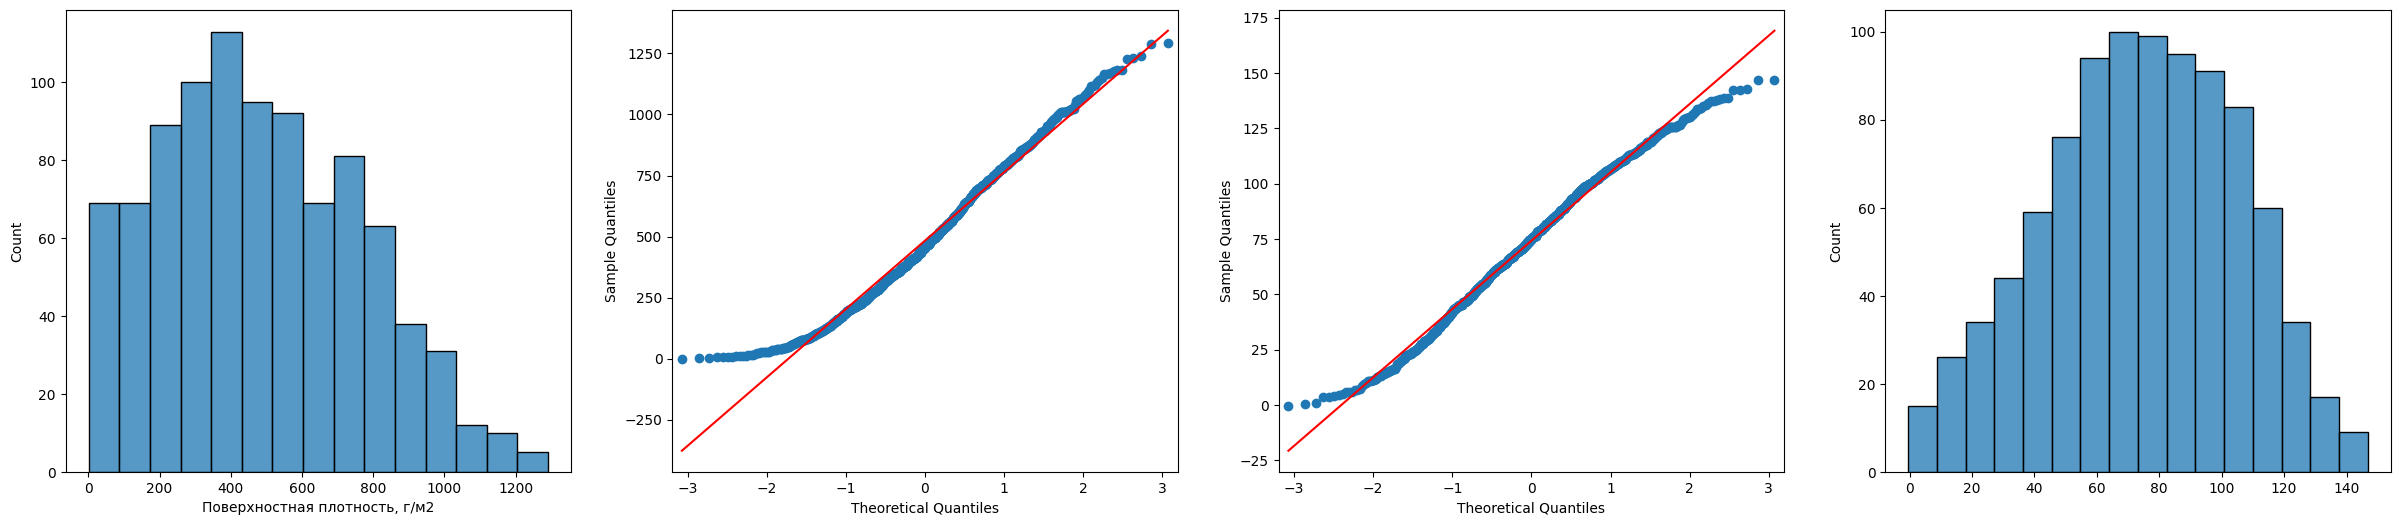

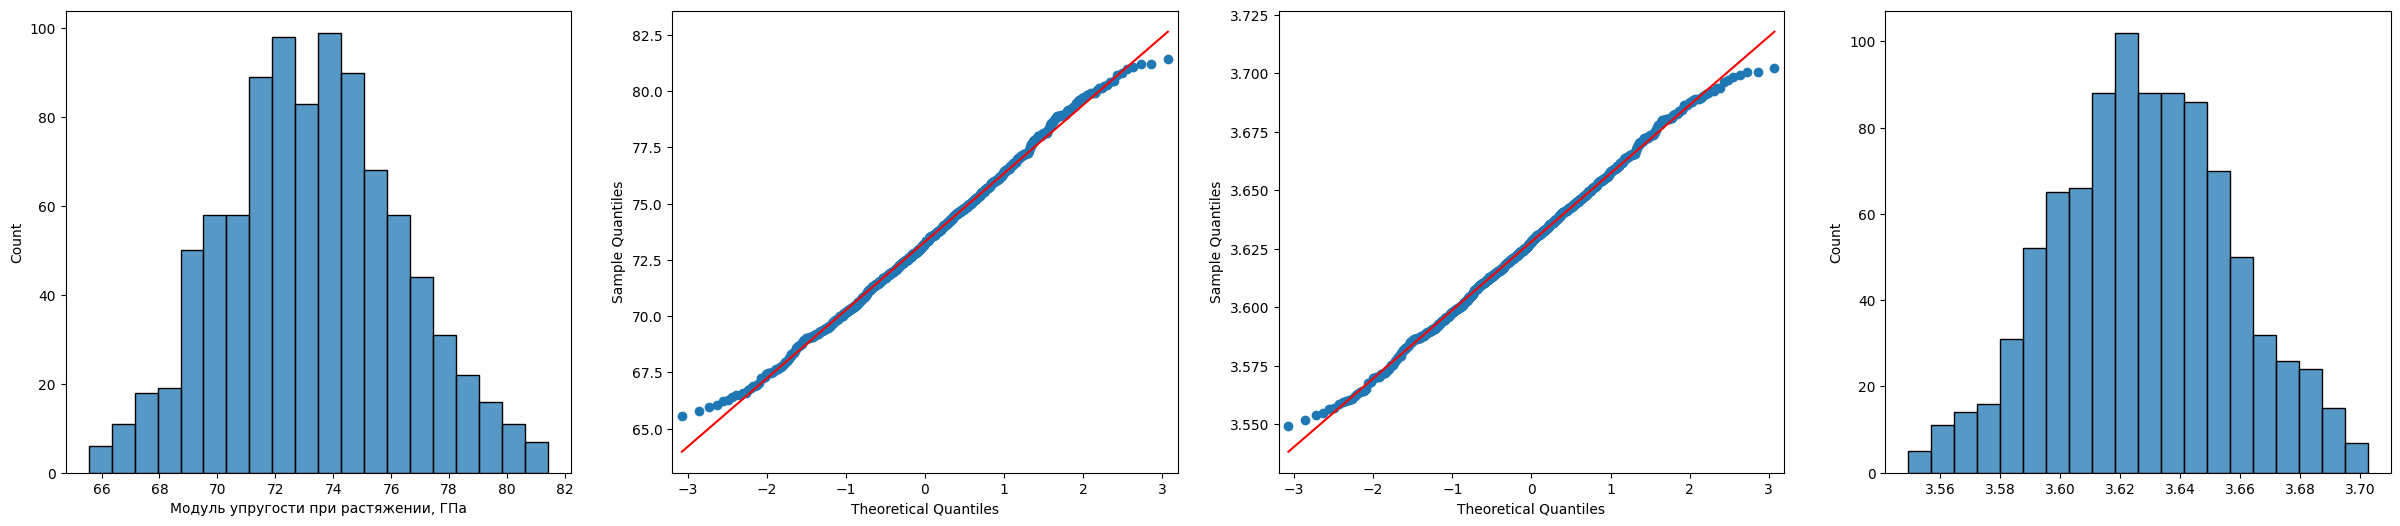

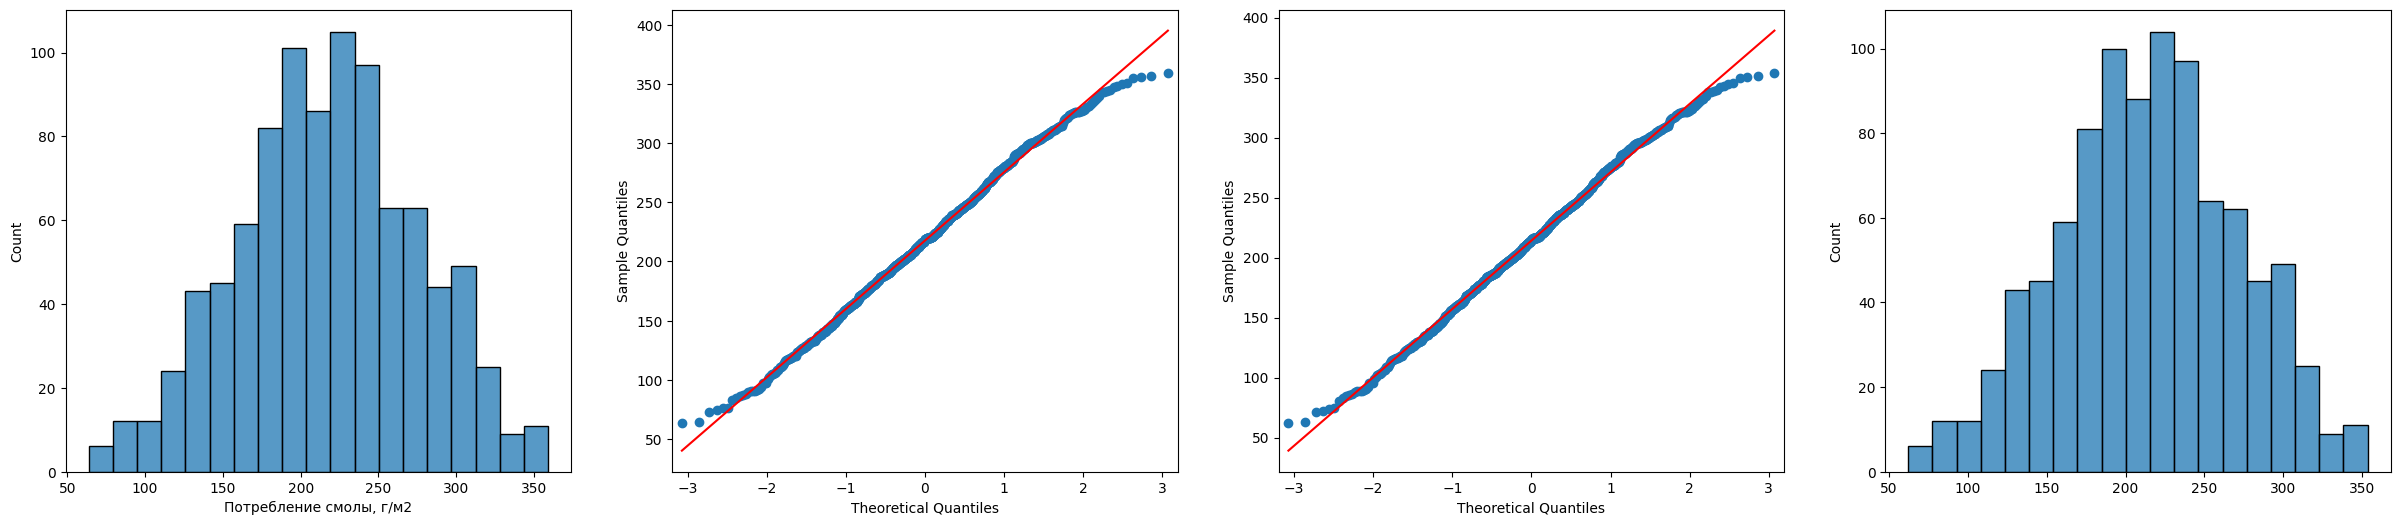

In [11]:
abnormal_columns = []
for col in cols_numerical.columns:
    if shapiro(cols_numerical[col].values)[1] < 0.05:
        abnormal_columns.append(col)
        fig, ax = plt.subplots(1, 4, figsize=(30, 6))
        sns.histplot(cols_numerical[col], ax=ax[0])
        sm.qqplot(cols_numerical[col], line='s', ax=ax[1])
        sm.qqplot(boxcox(cols_numerical[col])[0], line='s', ax=ax[2])
        sns.histplot(boxcox(cols_numerical[col])[0], ax=ax[3])
        plt.show()

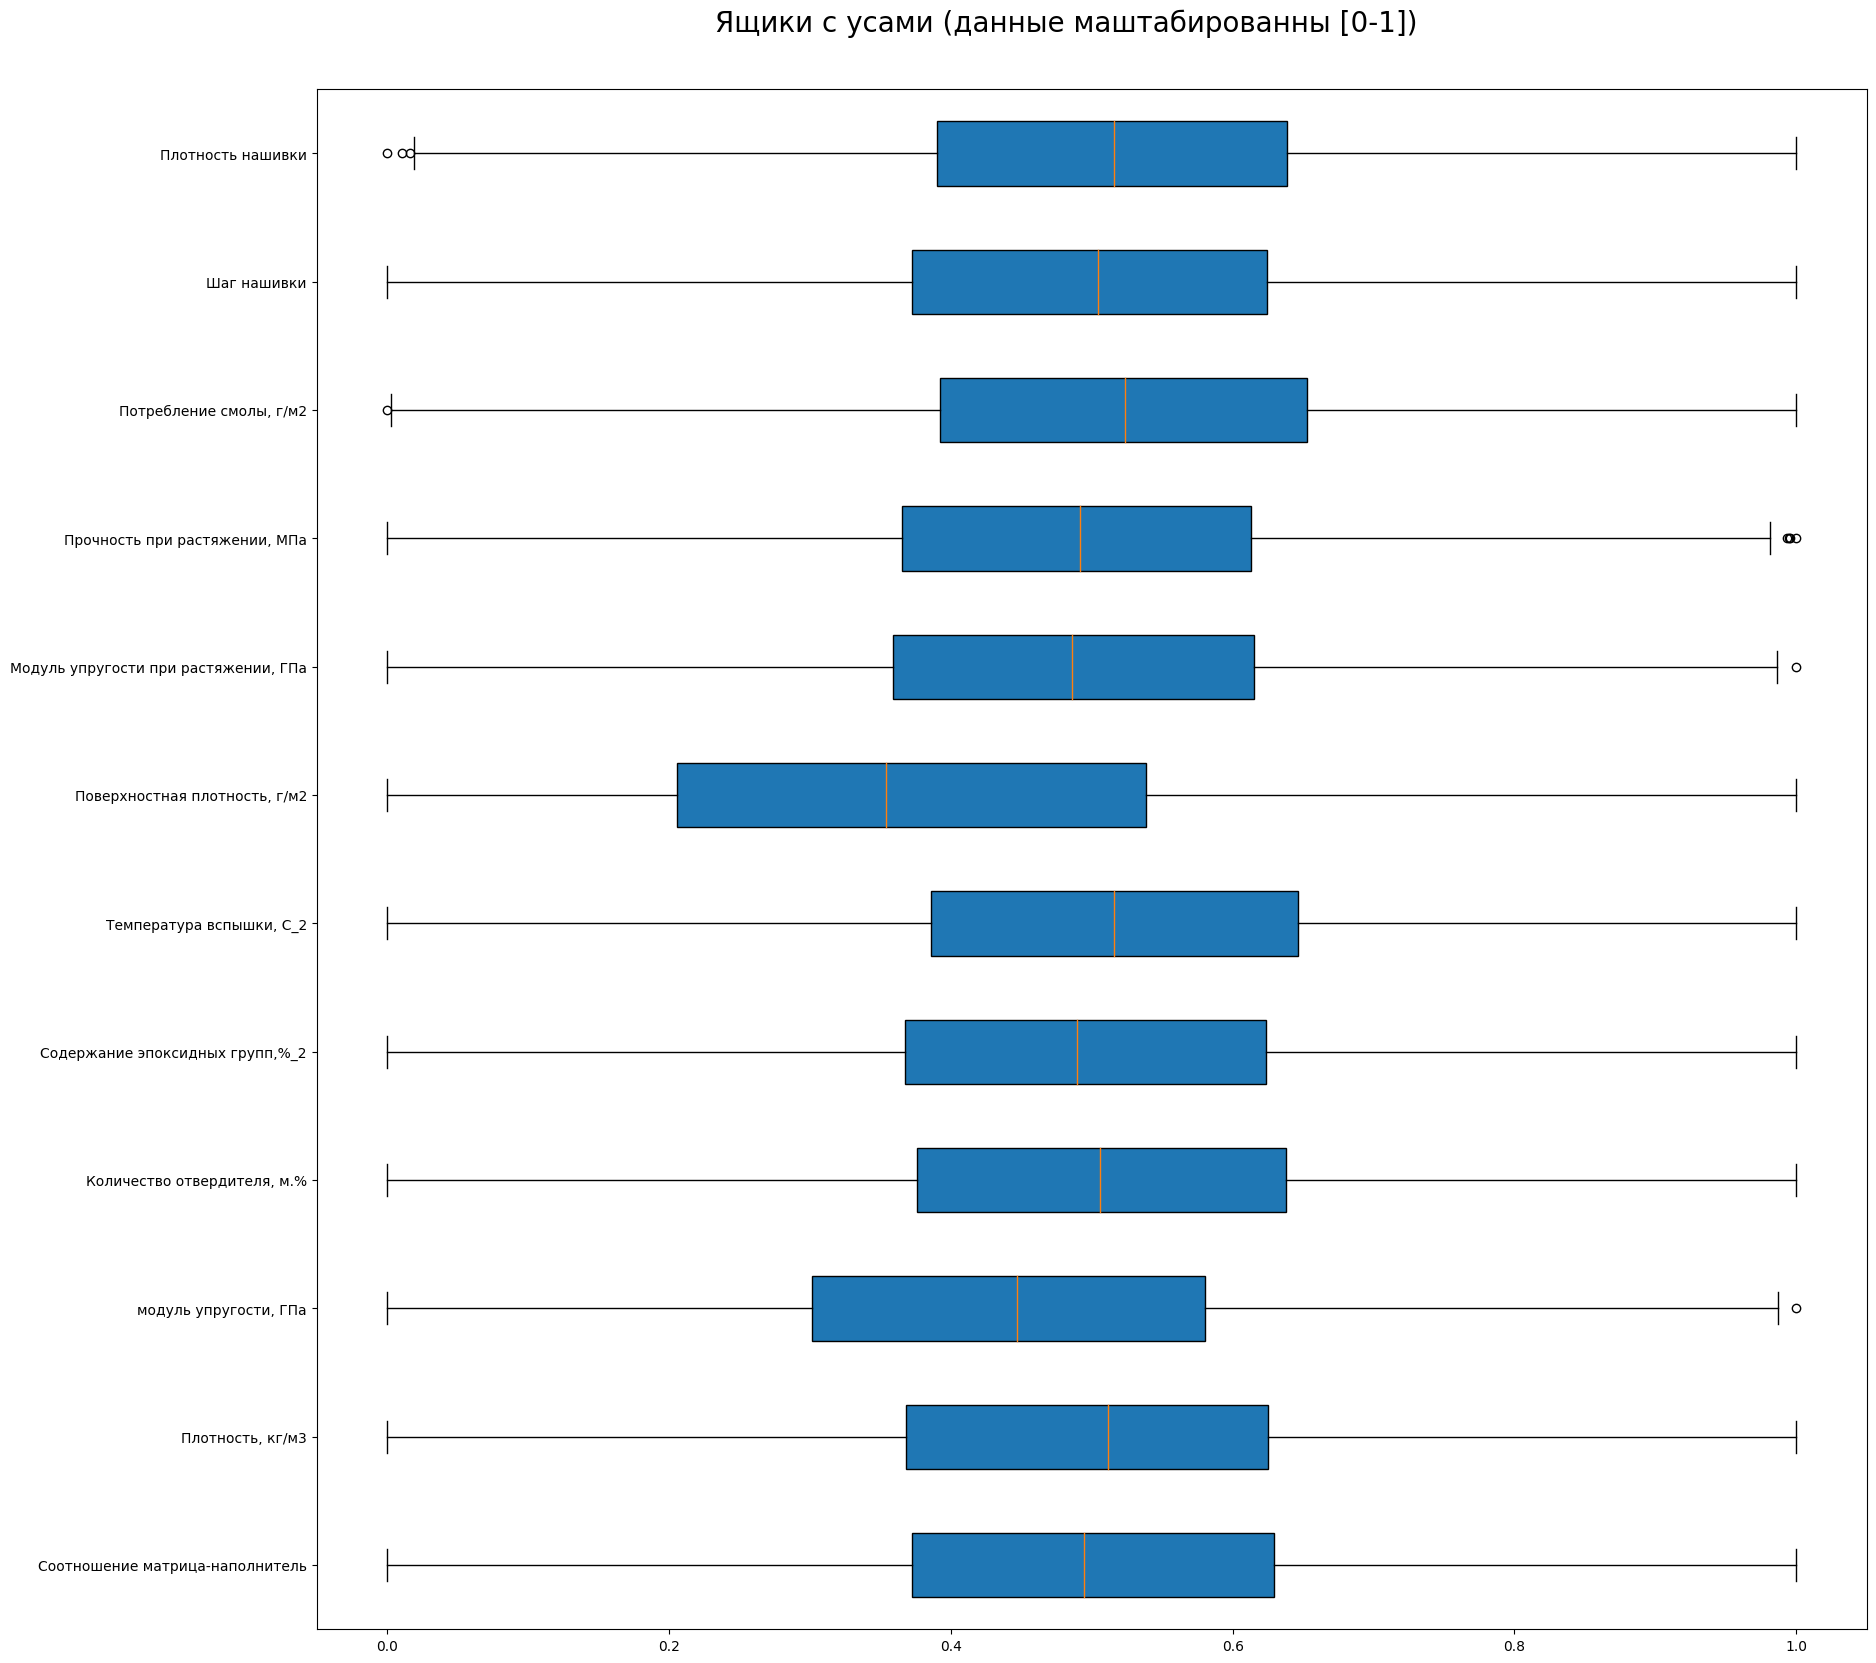

In [12]:
plt.figure(figsize = (20, 20))
plt.suptitle('Ящики с усами (данные маштабированны [0-1])', y = .92, fontsize = 20)
plt.boxplot(pd.DataFrame(MinMaxScaler().fit_transform(cols_numerical)),
labels = cols_numerical.columns, patch_artist = True, meanline = True, vert = False)
plt.show()

In [13]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [14]:
# Нормализация MinMaxScaler()
col = df.columns
mmscaler = MinMaxScaler()
mmscaler.fit(df)
minmax = pd.DataFrame(mmscaler.transform(df), columns=col)
minmax.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


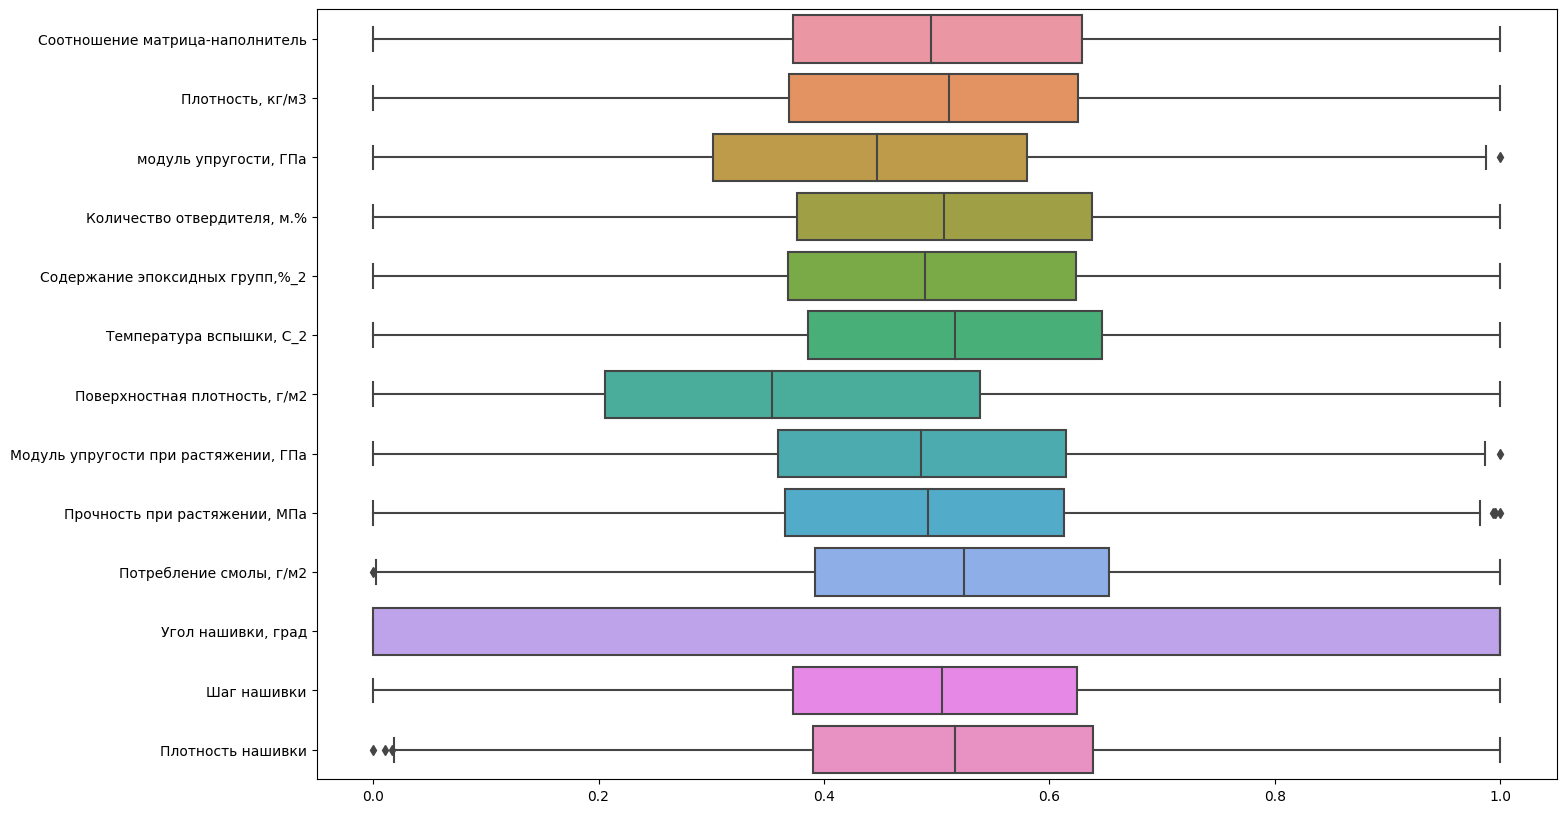

In [15]:
# после нормализации [0-1]  MinMaxScaler()
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = minmax, orient="h", )

In [16]:
# попробуем снизить размерность 

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
pca.fit(minmax, )
X_pca = pca.transform(minmax)
print("Форма исходного массива: {}".format(str(minmax.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (936, 13)
Форма массива после сокращения размерности: (936, 2)


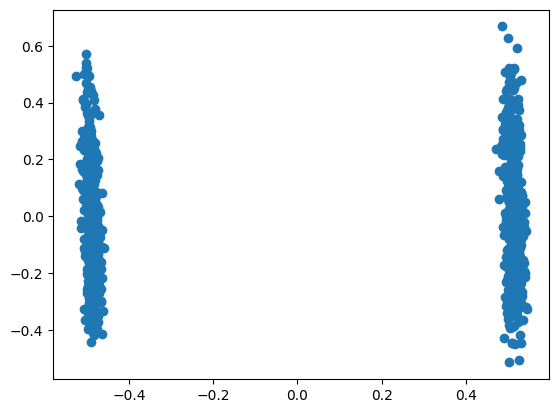

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

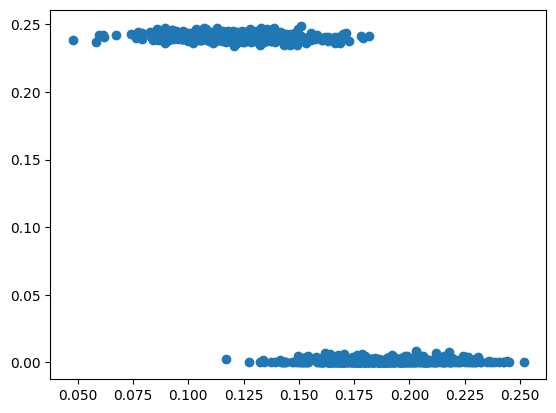

In [19]:
from sklearn.decomposition import NMF
nmf = NMF( 
    # random_state=0, 
            n_components=2,
                # init='nndsvdar', # nndsvd
                # solver='mu', 
                # max_iter=3000,
                # alpha_W='alph_W',
                # alpha_H=0, 
                # l1_ratio='L1_ratio',
                # shuffle=True
            )
nmf.fit(minmax)
minmax_nmf = nmf.transform(minmax)

plt.scatter(minmax_nmf[:,0], minmax_nmf[:,1])

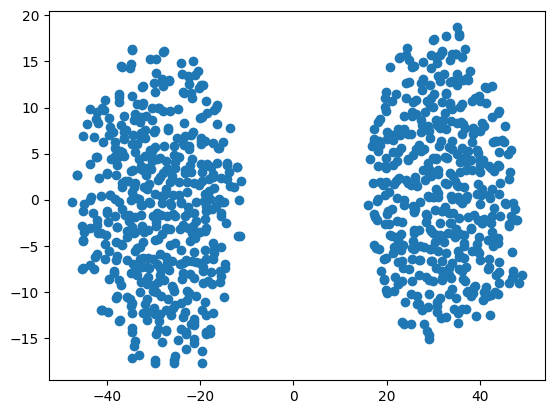

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
minmax_tsne = tsne.fit_transform(minmax)
plt.scatter(minmax_tsne[:,0], minmax_tsne[:,1])


<AxesSubplot: ylabel='Density'>

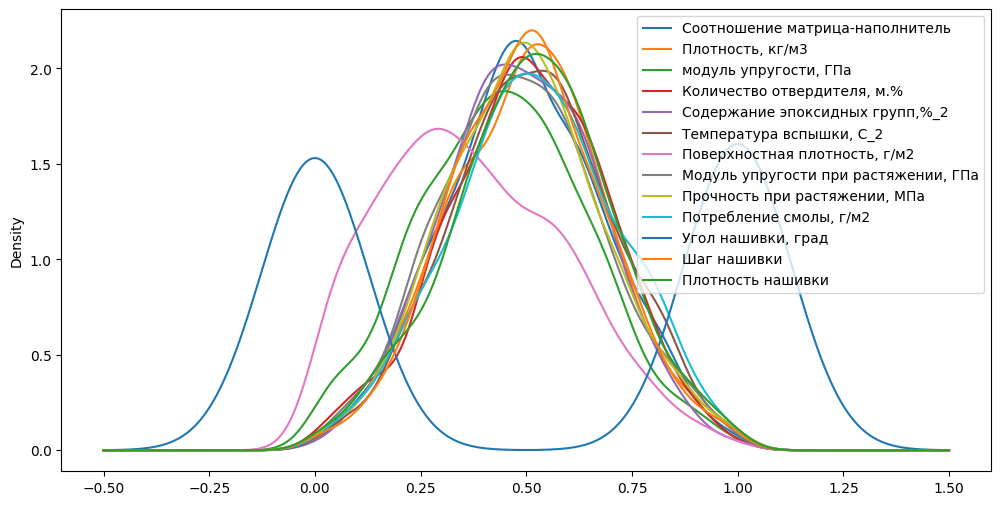

In [21]:
# 
fig, ax = plt.subplots(figsize = (12, 6))
minmax.plot(kind = 'kde', ax = ax)

In [22]:
# обратная трансформация MinMaxScaler
result = mmscaler.inverse_transform(minmax)
initial_data = pd.DataFrame(result, columns = minmax.columns)
initial_data.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
